In [1]:
import numpy as np

In [2]:
var1 = np.array([120, 140, 132, 160, 110, 131])
var2 = np.array([200, 180, 191, 161, 210, 188])

In [3]:
np.corrcoef(var1, var2)[0,1]

-0.996864251342404

In [4]:
 %matplotlib inline

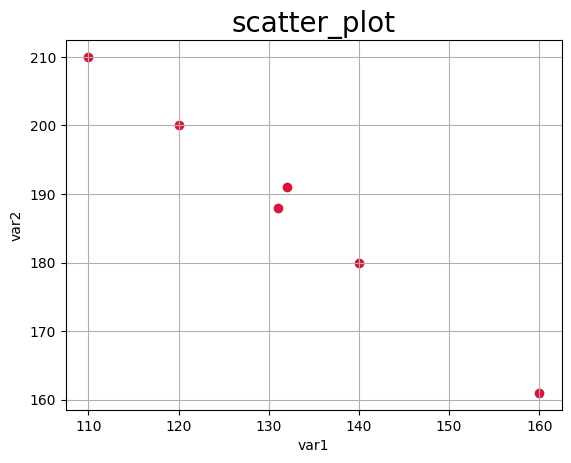

In [5]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.title('scatter_plot', fontsize=20)
plt.xlabel('var1')
plt.ylabel('var2')
plt.scatter(var1, var2, marker='o', color  = 'crimson')
plt.show()

In [31]:
import pandas as pd
data = pd.read_csv('pokemon.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [39]:
data['weight_kg'] = pd.to_numeric(data['weight_kg'], errors='coerce')
cr = data['weight_kg'].corr(data['height_m'])
print(cr)

0.6265511437853196


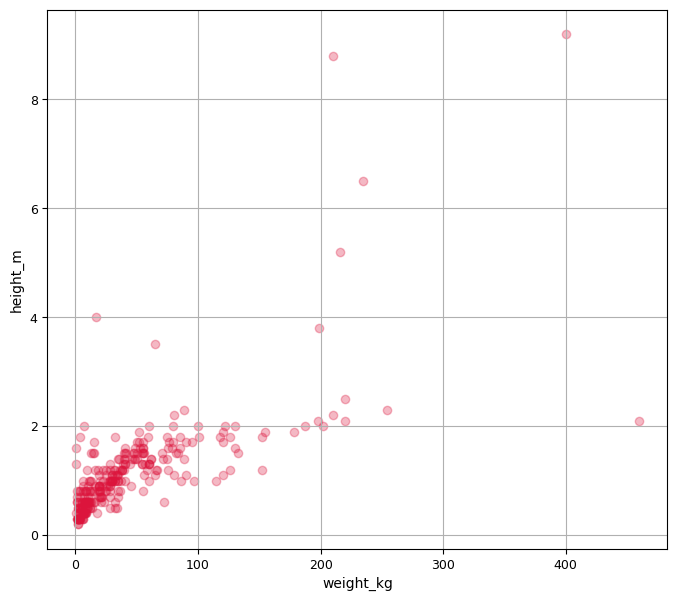

In [40]:
fig = plt.figure('sctrplt', figsize=(8, 7))
plt.grid(True)
plt.xlabel('weight_kg')
plt.ylabel('height_m')
plt.yticks(size=9)
plt.xticks(size=9)

x = data.head(300)['weight_kg']
y = data.head(300)['height_m']
plt.scatter(x, y, color='crimson', alpha=0.3)
plt.show()

In [46]:
df = pd.DataFrame(data, columns=['weight_kg', 'height_m', 'speed', 'base_happiness', 'defense', 'attack', 'against_dragon'])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,weight_kg,height_m,speed,base_happiness,defense,attack,against_dragon
weight_kg,1.000000,0.626551,0.051384,-0.405840,0.424067,0.382183,0.126003
height_m,0.626551,1.000000,0.202202,-0.343394,0.361938,0.423160,0.164464
speed,0.051384,0.202202,1.000000,-0.148753,0.007934,0.352703,0.078123
base_happiness,-0.405840,-0.343394,-0.148753,1.000000,-0.191503,-0.251811,-0.151915
defense,0.424067,0.361938,0.007934,-0.191503,1.000000,0.468915,-0.023794
attack,0.382183,0.423160,0.352703,-0.251811,0.468915,1.000000,0.138217
against_dragon,0.126003,0.164464,0.078123,-0.151915,-0.023794,0.138217,1.000000


In [45]:
data.against_dragon.value_counts()

1.0    669
0.0     47
2.0     43
0.5     42
Name: against_dragon, dtype: int64

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
import math

In [ ]:
 # 1 задание

In [49]:
df = pd.DataFrame({'День':['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
                  'Улица':[80, 98, 75, 91, 78],
                  'Гараж':[100, 82, 105, 89, 102]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   День    5 non-null      object
 1   Улица   5 non-null      int64 
 2   Гараж   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [51]:
np.corrcoef(df['Улица'], df['Гараж'])[0,1]

-0.9999999999999998

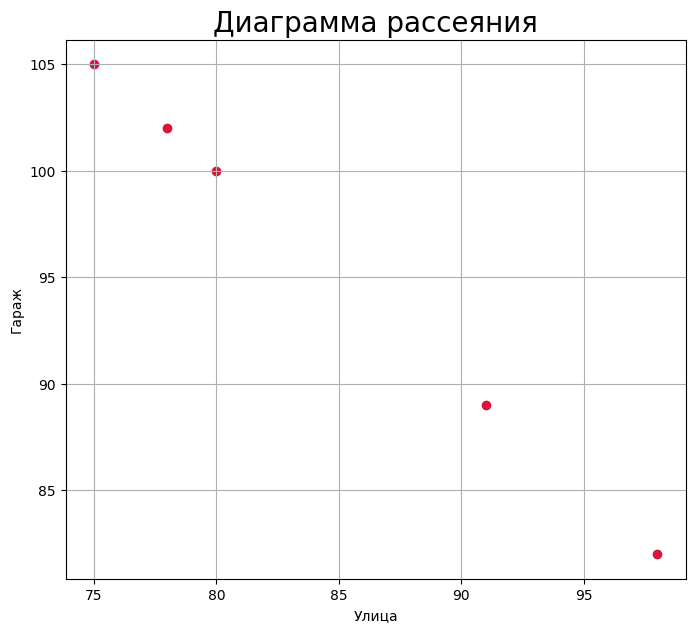

In [55]:
fig = plt.figure('scttr_plt', figsize=(8, 7))
plt.grid(True)
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.title('Диаграмма рассеяния', fontsize=20)
x = np.array(df['Улица'])
y = np.array(df['Гараж'])
plt.scatter(x, y, color='crimson')
plt.show()

In [56]:
 # 2 задание 

In [83]:
import pandas as pd
data = pd.read_csv('pokemon.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [67]:
df = pd.DataFrame(data, columns=['weight_kg', 'height_m', 'speed', 'base_happiness', 'defense', 'attack', 'hp', 'sp_attack', 'sp_defense'])
corr = df.corr().height_m.to_frame().round(2)
corr.style.background_gradient(cmap='coolwarm')

,height_m
weight_kg,0.630000
height_m,1.000000
speed,0.200000
base_happiness,-0.340000
defense,0.360000
attack,0.420000
hp,0.480000
sp_attack,0.350000
sp_defense,0.330000


In [64]:
df.isna().sum()

weight_kg         20
height_m          20
speed              0
base_happiness     0
defense            0
attack             0
hp                 0
sp_attack          0
sp_defense         0
dtype: int64

In [72]:
df.dropna(inplace=True) # удалить строки с пустыми значениями

In [76]:
model = LinearRegression()

X = df[['weight_kg']]
y = df[['height_m']]
X = np.array(X, type(float))
y = np.array(y, type(float))

model.fit(X, y)

LinearRegression()

In [77]:
model.coef_, model.intercept_

(array([[0.00618976]]), array([0.78397676]))

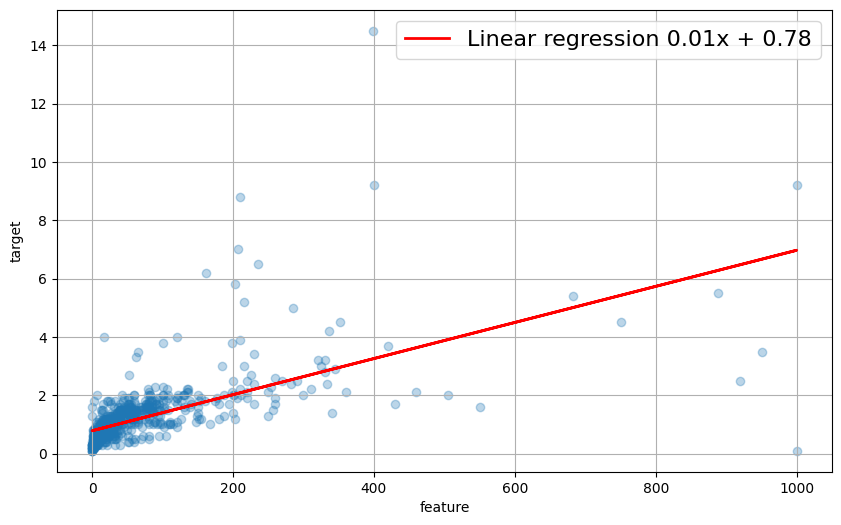

In [79]:
model_a = model.coef_[0][0]
model_b = model.intercept_[0]

model_y_sk = model_a * X + model_b

fig = plt.figure(figsize=(10,6))
plt.plot(X, model_y_sk, linewidth=2, color='r', label=f'Linear regression {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X, y, alpha=0.3)
plt.grid(True)
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size':16})
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model_y_sk, y)

0.7080310309878495

In [82]:
 # 3 задание

In [84]:
import pandas as pd
data = pd.read_csv('insurance.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [112]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import sem

In [113]:
southeast = data[data['region'] == 'southeast']['bmi']
southwest = data[data['region'] == 'southwest']['bmi']
northwest = data[data['region'] == 'northwest']['bmi']
northeast = data[data['region'] == 'northeast']['bmi']

In [114]:
stats.f_oneway(southeast, southwest, northwest, northeast)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

In [115]:
model = ols('bmi ~ region', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


In [116]:
regions = data['region'].unique()

for region1 in range(len(regions)):
    for region2 in range(region1 + 1, len(regions)):
        region1_data = data[data['region'] == regions[region1]]['bmi']
        region2_data = data[data['region'] == regions[region2]]['bmi']
        t_stat, p_value = stats.ttest_ind(region1_data, region2_data)
        print(f"{regions[region1]} vs {regions[region2]}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")


southwest vs southeast: t-statistic = -5.91, p-value = 0.0000
southwest vs northwest: t-statistic = 3.28, p-value = 0.0011
southwest vs northeast: t-statistic = 3.12, p-value = 0.0019
southeast vs northwest: t-statistic = 9.26, p-value = 0.0000
southeast vs northeast: t-statistic = 8.79, p-value = 0.0000
northwest vs northeast: t-statistic = 0.06, p-value = 0.9519


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


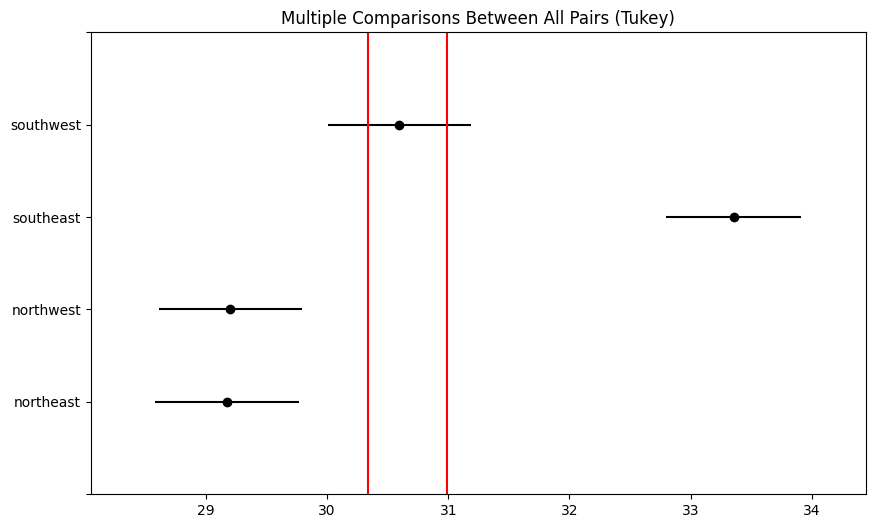

In [119]:
tukey = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'], alpha=0.05)
tukey.plot_simultaneous()
confidence_interval = stats.t.interval(0.95, df=len(data['bmi'])-1, loc=np.mean(data['bmi']), scale=sem(data['bmi']))
plt.vlines(x=confidence_interval, ymin=-1, ymax=4, color='r')
tukey.summary()


In [120]:
model = ols('bmi ~ region * sex', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [121]:
tukey = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'] + data['sex'])

In [122]:
print(anova_table)
print(tukey.summary())

                  sum_sq      df          F        PR(>F)
region       4034.975135     3.0  39.398134  2.163195e-24
sex            86.007035     1.0   2.519359  1.126940e-01
region:sex    174.157808     3.0   1.700504  1.650655e-01
Residual    45404.154911  1330.0        NaN           NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
northeastfemale   northeastmale  -0.2998 0.9998 -2.2706  1.6711  False
northeastfemale northwestfemale  -0.0464    1.0 -2.0142  1.9215  False
northeastfemale   northwestmale  -0.2042    1.0 -2.1811  1.7728  False
northeastfemale southeastfemale   3.3469    0.0    1.41  5.2839   True
northeastfemale   southeastmale   4.6657    0.0  2.7634   6.568   True
northeastfemale southwestfemale   0.7362 0.9497 -1.2377    2.71  False
northeastfemale   southwestmale   1.8051 0.1007 -0.1657   3.776  False


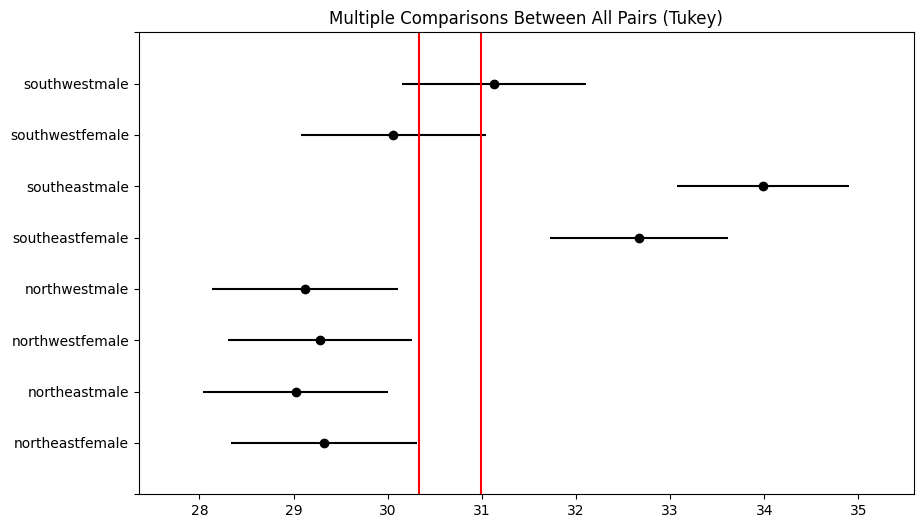

In [124]:
tukey.plot_simultaneous()
plt.vlines(x=confidence_interval, ymin=-1, ymax=8, color='r')
plt.show()